# P4 Assignment

## Bathymetry Map

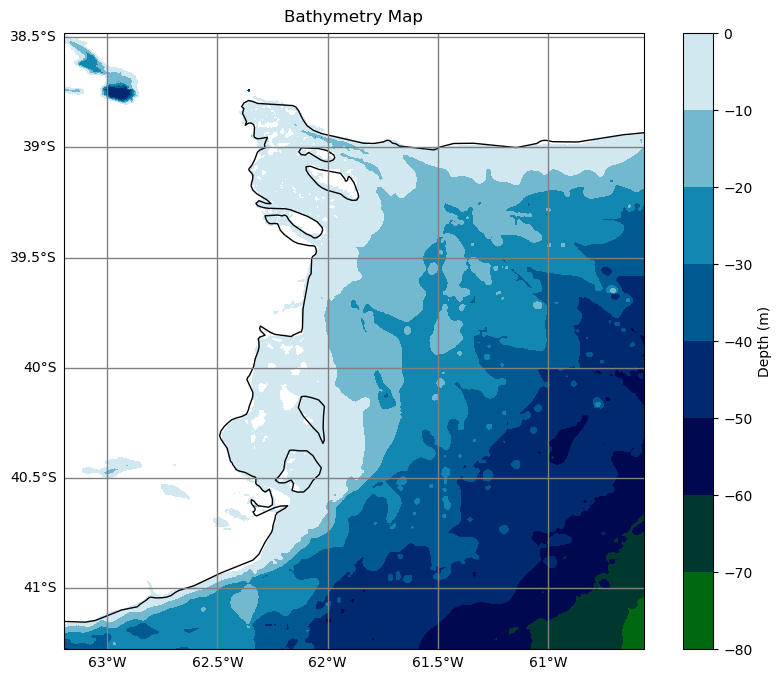

In [7]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import numpy as np

# Load bathymetry data
bathymetry_data = xr.open_dataset(r'C:\Users\user\Downloads\SCDM\P4\gebco_2023_n-38.4787_s-41.2771_w-63.1983_e-60.5617.nc')

# Extracting bathymetry values and coordinate information
bathymetry = bathymetry_data['elevation'].values
lat = bathymetry_data['lat'].values
lon = bathymetry_data['lon'].values

# Remove landmass
bathymetry = np.ma.masked_where(bathymetry > 0, bathymetry)

# Create a figure
plt.figure(figsize=(10, 8))

# Define the projection (here, Plate Carree projection)
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the bathymetry data
plt.contourf(lon, lat, bathymetry, transform=ccrs.PlateCarree(), cmap= 'ocean')

# Add coastlines
ax.coastlines()

# Add gridlines
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', linestyle='-')
gl.right_labels = False
gl.top_labels = False

# Add color bar
plt.colorbar(label='Depth (m)')

# Add title
plt.title('Bathymetry Map')

# Show the plot
plt.show()


## Mean annual chlorophyll

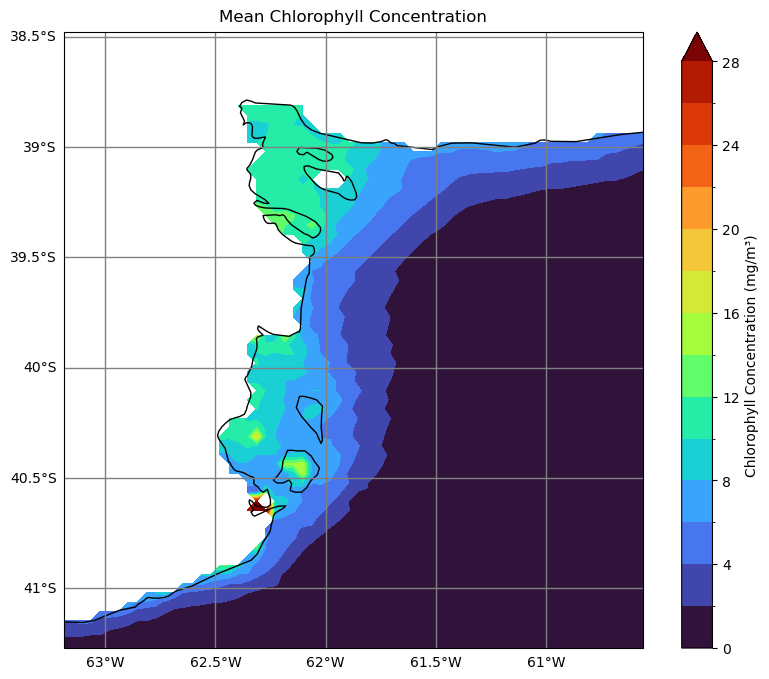

In [13]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import numpy as np

# Load chlorophyll data
ds = xr.open_dataset(r'C:\Users\user\Downloads\SCDM\P4\ESACCI-OC-MAPPED-CLIMATOLOGY-1M_MONTHLY_4km_PML_CHL-fv5.0.nc')

# Define the coordinates for the region of interest
coord = [-38.4787, -41.2771, -63.1983, -60.5617]

# Select the region of interest
cropped_ds = ds.sel(lat=slice(coord[0], coord[1]), lon=slice(coord[2], coord[3]))

# Calculate the mean chlorophyll concentration
mean_chlor_a = cropped_ds['chlor_a'].mean(dim='time')

# Plot the mean chlorophyll concentration
plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Choose colormap and levels
cmap = 'turbo'
levels = np.arange(0., 30., 2.)

# Create contour plot without showing it
contour = mean_chlor_a.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), cmap=cmap, levels=levels, add_colorbar=False, )

# Add coastlines
ax.coastlines()

# Add gridlines
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', linestyle='-')
gl.right_labels = False
gl.top_labels = False

# Add colorbar manually
cbar = plt.colorbar(contour, ax=ax, orientation='vertical', label='Chlorophyll Concentration (mg/m³)')

# Set title
plt.title('Mean Chlorophyll Concentration')

# Show the plot
plt.show()


## Mean monthly chlorophyll 

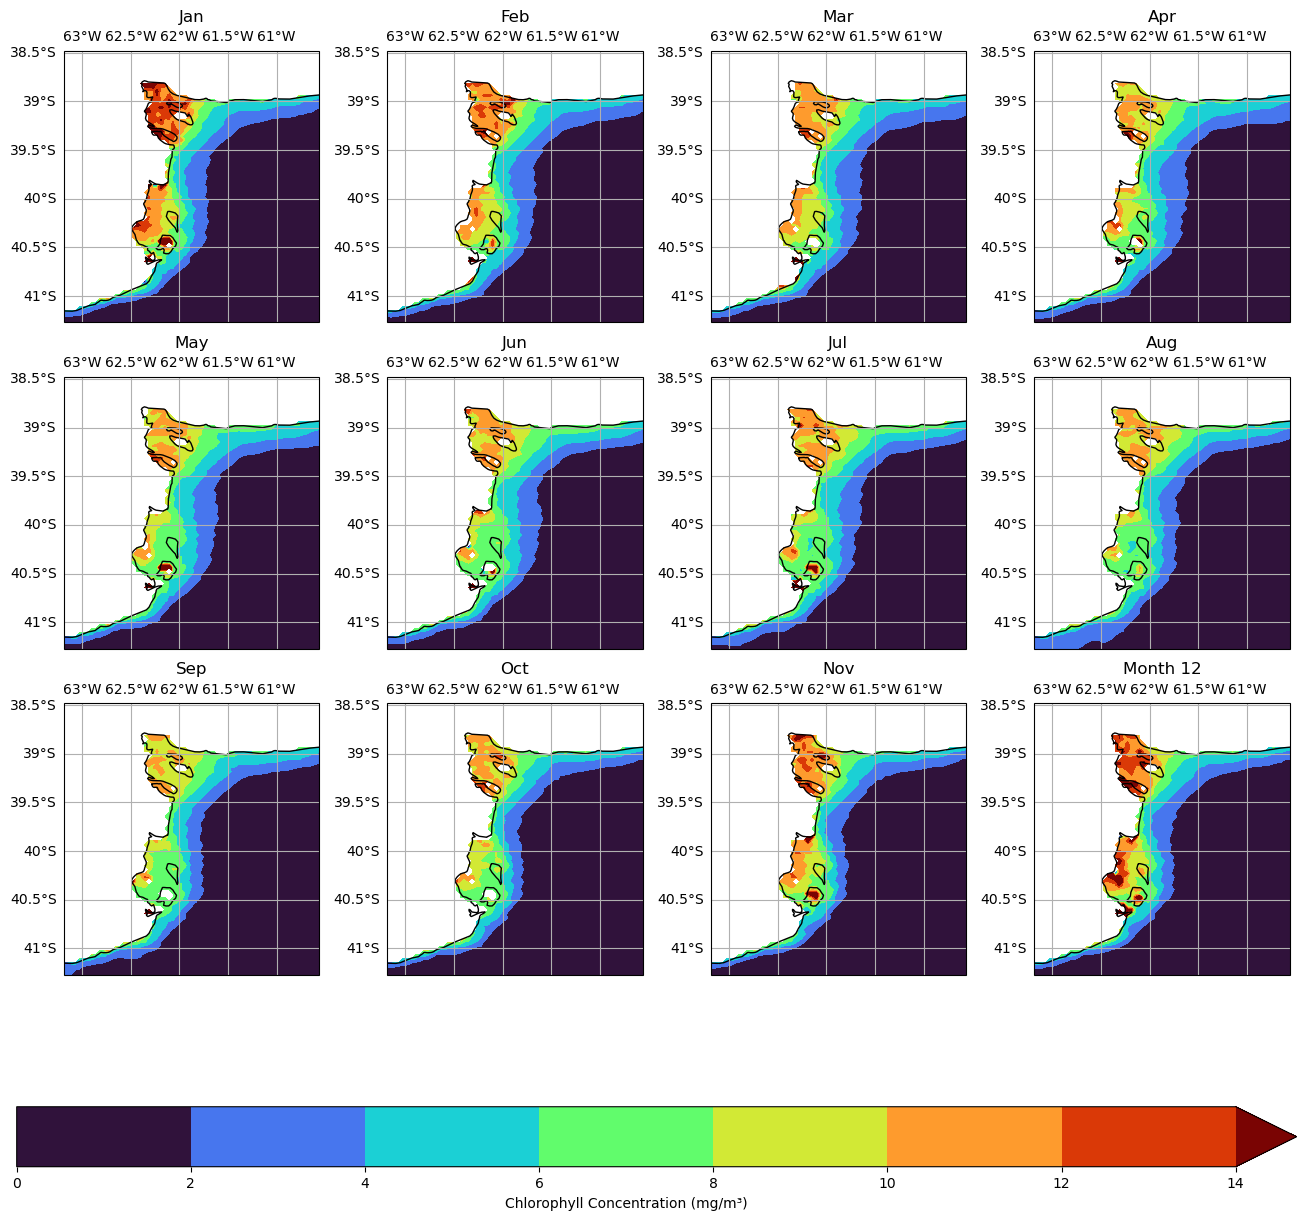

In [12]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import numpy as np

# Load chlorophyll data
ds = xr.open_dataset(r'C:\Users\user\Downloads\SCDM\P4\ESACCI-OC-MAPPED-CLIMATOLOGY-1M_MONTHLY_4km_PML_CHL-fv5.0.nc')

# Define the coordinates for the region of interest
coord = [-38.4787, -41.2771, -63.1983, -60.5617]

# Select the region of interest
cropped_ds = ds.sel(lat=slice(coord[0], coord[1]), lon=slice(coord[2], coord[3]))

# Define colormap and levels for the annual mean map
cmap_annual = 'turbo'
levels_annual = np.arange(0., 30., 2.)

# Define colormap and levels for the monthly maps
cmap_monthly = 'turbo'
levels_monthly = np.arange(0., 15., 2.)

# Create a faceted figure with 12 subplots (one for each month)
fig, axs = plt.subplots(3, 4, figsize=(16, 12), subplot_kw={'projection': ccrs.PlateCarree()})

# Iterate over each month
for i, month in enumerate(range(1, 13)):
    # Calculate the mean chlorophyll concentration for the current month
    mean_chlor_a_monthly = cropped_ds['chlor_a'].where(cropped_ds['time.month'] == month).mean(dim='time')

    # Determine the subplot coordinates
    row = i // 4
    col = i % 4

    # Plot the chlorophyll concentration for the current month
    contour = mean_chlor_a_monthly.plot.contourf(ax=axs[row, col], transform=ccrs.PlateCarree(),
                                                 cmap=cmap_monthly, levels=levels_monthly, add_colorbar=False)

    # Add coastlines
    axs[row, col].coastlines()

    # Add a title for the months
    axs[0, 0].set_title('Jan')
    axs[0, 1].set_title('Feb')
    axs[0, 2].set_title('Mar')
    axs[0, 3].set_title('Apr')
    axs[1, 0].set_title('May')
    axs[1, 1].set_title('Jun')
    axs[1, 2].set_title('Jul')
    axs[1, 3].set_title('Aug')
    axs[2, 0].set_title('Sep')
    axs[2, 1].set_title('Oct')
    axs[2, 2].set_title('Nov')
    axs[2, 3].set_title('Dec')

    # Add gridlines
    gl = axs[row, col].gridlines(draw_labels=True)
    gl.right_labels = False
    gl.bottom_labels = False

    # Add a title for the current month
    axs[row, col].set_title(f'Month {month}')

cbar_ax = fig.add_axes([0.1, -0.05, 0.8, 0.05])  # [left, bottom, width, height]
cbar = plt.colorbar(contour, cax=cbar_ax, orientation='horizontal', label='Chlorophyll Concentration (mg/m³)')

# Show the plot
plt.show()


## Time series comparison

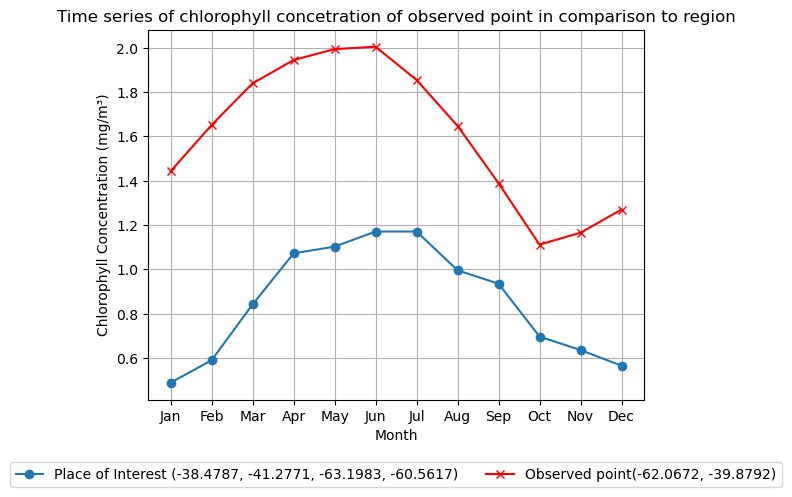

In [5]:
import matplotlib.pyplot as plt
import xarray as xr

# Load the dataset
ds1 = xr.open_dataset(r'C:\Users\user\Downloads\SCDM\P4\ESACCI-OC-MAPPED-CLIMATOLOGY-1M_MONTHLY_4km_PML_CHL-fv5.0.nc')

#Region of intrest
cropped_ds1 = ds1.sel(lat=slice(-39.3022, -40.4), lon=slice(-61.8913, -60.993))
chl_mean1 = cropped_ds1.mean(dim=['lat', 'lon'])

#Observed point
monclim1 = cropped_ds1.groupby('time.month').mean(dim='time')
point1 = monclim1.sel(lat=-62.0672, lon=-39.8792, method='nearest')

# Plot
plt.plot(monclim1['month'], point1['chlor_a'], marker='o', label='Region 1')
plt.plot(chl_mean1['time.month'], chl_mean1['chlor_a'], '-r', marker='x', label='Region 2')

# Set x-axis tick positions and labels
plt.gca().set_xticks(range(1, 13))
plt.gca().set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month')
plt.ylabel('Chlorophyll Concentration (mg/m³)')
plt.grid()
plt.legend({'Place of Interest (-38.4787, -41.2771, -63.1983, -60.5617)': 'Place of Interest (-38.4787, -41.2771, -63.1983, -60.5617)', 'Observed point(-62.0672, -39.8792)' :'Observed point(-62.0672, -39.8792)'}, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.title('Time series of chlorophyll concetration of observed point in comparison to region')
plt.show()
